## Exploratory Data Analysis on `small_matrix.csv` to understand the data

EDA on `small_matrix.csv` is crucial because it allows us to understand the structure, quality, and patterns in the data before building models or drawing conclusions. Since it's smaller, the computation time is also, so it makes things easier to manage.

Through EDA, we will be able to:

- Identify missing values, outliers, and data inconsistencies.
- Understand user and item activity distributions (e.g., power users, viral items).
- Assess temporal patterns and session behaviors.
- Evaluate the sparsity of the user-item interaction matrix, which is critical for recommender systems.

**Transposing conclusions to `big_matrix.csv`:**

Given the statistics:

| Matrix        | #Users | #Items | #Interactions | Density |
|---------------|--------|--------|---------------|---------|
| small matrix  | 1,411  | 3,327  | 4,676,570     | 99.6%   |
| big matrix    | 7,176  | 10,728 | 12,530,806    | 16.3%   |

- The `small_matrix.csv` is almost fully dense (99.6%), meaning nearly every user has interacted with almost every item. This makes it ideal for initial EDA, as patterns are easier to detect and visualize.
- The `big_matrix.csv` is much sparser (16.3% density), which is more typical in real-world recommendation scenarios. Insights from EDA on the small matrix (such as handling missing data, identifying cold users/items, and understanding interaction distributions) are directly applicable, but the effects of sparsity (e.g., cold-start problems, long-tail distributions) will be more pronounced.
- Techniques and preprocessing steps validated on the small matrix (like sessionization, recency features, and sparsity visualization) should be adapted and carefully re-applied to the big matrix, with special attention to the challenges introduced by higher sparsity.

In summary, EDA on the small matrix helps establish robust analysis and preprocessing pipelines, which can then be scaled and adjusted for the more challenging, sparse big matrix.


### Fetching data from Google Drive

In [5]:
# Get the data
%%bash
wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
' -O KuaiRec.zip
unzip KuaiRec.zip -d data_final_project

SyntaxError: unterminated string literal (detected at line 3) (122612457.py, line 3)

### Imports and path setup
(change the `DATA_DIR` variable if any path problem occurs)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import timedelta

plt.style.use("default") 
sns.set_context("talk")

plt.rcParams["figure.figsize"] = (10, 6)

DATA_DIR = Path("data_final_project/KuaiRec 2.0/data")  # change if needed
SMALL_INTERACTIONS = DATA_DIR / "small_matrix.csv"

### Data analysis

In [7]:
interactions = (
    pd.read_csv(SMALL_INTERACTIONS)
)
print("Loaded", len(interactions), "rows →", interactions["user_id"].nunique(), "users /", interactions["video_id"].nunique(), "videos")
interactions.head()

Loaded 4676570 rows → 1411 users / 3327 videos


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


#### 🔍 Quick overview of datatypes


In [8]:
print("→ dtypes and non‑null counts")
print(interactions.info())

# Numeric summaries for all numeric cols
numeric_cols = interactions.select_dtypes(include=[np.number]).columns
interactions[numeric_cols].describe(percentiles=[.01, .05, .5, .95, .99]).T


→ dtypes and non‑null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676570 entries, 0 to 4676569
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   video_id        int64  
 2   play_duration   int64  
 3   video_duration  int64  
 4   time            object 
 5   date            float64
 6   timestamp       float64
 7   watch_ratio     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 285.4+ MB
None


,count,mean,std,min,1%,5%,50%,95%,99%,max
user_id,4676570.0,3.631649e+03,2.043873e+03,1.400000e+01,9.800000e+01,4.070000e+02,3.687000e+03,6.776000e+03,7.100000e+03,7.162000e+03
video_id,4676570.0,4.974939e+03,3.064622e+03,1.030000e+02,2.030000e+02,5.560000e+02,4.692000e+03,9.951000e+03,1.037400e+04,1.059500e+04
play_duration,4676570.0,8.612637e+03,1.223661e+04,0.000000e+00,5.430000e+02,1.995000e+03,7.549000e+03,1.576100e+04,3.149931e+04,7.988155e+06
video_duration,4676570.0,1.448645e+04,2.046711e+04,3.067000e+03,4.885000e+03,5.900000e+03,9.600000e+03,4.513400e+04,1.398770e+05,3.150720e+05
date,4494578.0,2.020077e+07,4.895180e+01,2.020070e+07,2.020071e+07,2.020071e+07,2.020080e+07,2.020083e+07,2.020090e+07,2.020090e+07
timestamp,4494578.0,1.596241e+09,1.254444e+06,1.593801e+09,1.593998e+09,1.594278e+09,1.596224e+09,1.598419e+09,1.598922e+09,1.599321e+09
watch_ratio,4676570.0,9.070695e-01,1.362324e+00,0.000000e+00,2.228920e-02,1.067680e-01,7.691666e-01,1.953971e+00,3.585138e+00,5.715214e+02


In [9]:
missing = interactions.isna().mean().sort_values(ascending=False)
print("Missing‑value ratio:\n", missing)

Missing‑value ratio:
 date              0.038916
timestamp         0.038916
time              0.038916
user_id           0.000000
video_duration    0.000000
play_duration     0.000000
video_id          0.000000
watch_ratio       0.000000
dtype: float64


#### Few insights over data

In [ ]:

print("→ Unique values")
print("Unique user IDs:", interactions['user_id'].nunique())
print("Unique video IDs:", interactions['video_id'].nunique())
# Range of timestamps
print("→ Range of timestamps")
print("Min:",interactions['timestamp'].min(),'Max:',interactions['timestamp'].max())
# Display timestamp range in date format
print("→ Range of timestamps in date format")
interactions['timestamp'] = pd.to_datetime(interactions['timestamp'], unit='s')
print("Min:",interactions['timestamp'].min(),'Max:',interactions['timestamp'].max())


→ Unique values
Unique user IDs: 7176
Unique video IDs: 10728
→ Range of timestamps
Min: 1592872451.373 Max: 1599694332.427
→ Range of timestamps in date format
Min: 2020-06-23 00:34:11.372999907 Max: 2020-09-09 23:32:12.427000046


#### 🚨 Identify extreme power users / viral items


In [10]:
TOP_N = 10
print("Top users by interaction count:")
print(interactions["user_id"].value_counts().head(TOP_N))
print("\nTop items by interaction count:")
print(interactions["video_id"].value_counts().head(TOP_N))

# Flag ultra‑heavy tails for later down‑weighting
user_freq = interactions["user_id"].value_counts()
item_freq = interactions["video_id"].value_counts()

Top users by interaction count:
user_id
1834    3327
7018    3327
4681    3327
6886    3327
3201    3327
5149    3327
6122    3327
5339    3327
357     3326
3985    3326
Name: count, dtype: int64

Top items by interaction count:
video_id
2284    1411
8625    1411
183     1411
9165    1411
6238    1411
5348    1411
6789    1411
6017    1411
175     1411
1973    1411
Name: count, dtype: int64


#### 🧊 Cold user / item trimming (min_k interactions)


In the `small_matrix.csv`, we do not have any cold start users or items, but we do have some users and items with very few interactions.
And in the `big_matrix.csv`, we will have cold start users and items, so we will need to handle them differently.

In [11]:
MIN_K = 3
cold_users = user_freq[user_freq < MIN_K].index
cold_items = item_freq[item_freq < MIN_K].index

pre_cold = len(interactions)
interactions = interactions[~interactions["user_id"].isin(cold_users)]
interactions = interactions[~interactions["video_id"].isin(cold_items)]
print(f"Dropped {pre_cold - len(interactions):,} rows from cold‑start users/items")


Dropped 0 rows from cold‑start users/items


#### 📈 Distributions – log histograms


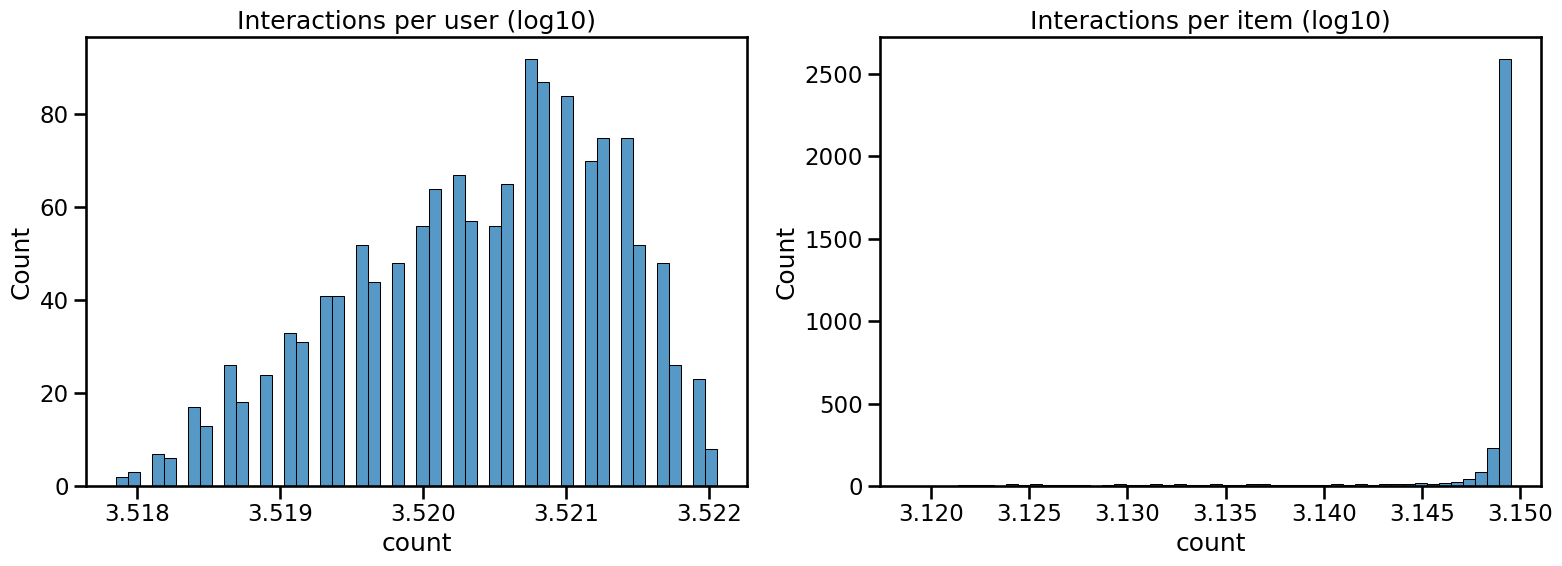

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].set_title("Interactions per user (log10)")
axes[1].set_title("Interactions per item (log10)")

sns.histplot(np.log10(user_freq), bins=50, ax=axes[0])
sns.histplot(np.log10(item_freq), bins=50, ax=axes[1])
plt.tight_layout()

#### 🕒 Timestamp → datetime + basic temporal stats


Earliest: 2020-07-03 18:23:26.059999943 | Latest: 2020-09-05 15:57:23.683000088


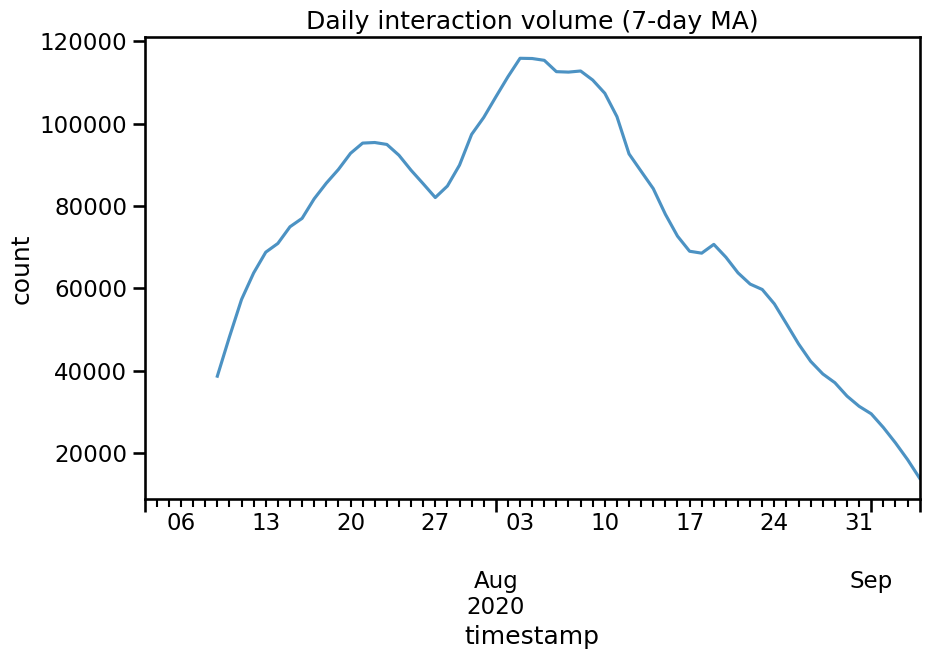

In [13]:
interactions["timestamp"] = pd.to_datetime(interactions["timestamp"], unit="s", errors="coerce")

print("Earliest:", interactions["timestamp"].min(), "| Latest:", interactions["timestamp"].max())

# Interactions over time (daily)
daily_counts = interactions.set_index("timestamp").resample("1D").size()
daily_counts.rolling(7).mean().plot(alpha=0.8)  # 7‑day moving average
plt.title("Daily interaction volume (7‑day MA)")
plt.ylabel("count")
plt.show()


#### ⏰ Sessionisation (gap‑based)


In [14]:
SESSION_GAP = timedelta(minutes=30)

interactions = interactions.sort_values(["user_id", "timestamp"])
session_break = interactions.groupby("user_id")["timestamp"].diff().gt(SESSION_GAP)
interactions["session_id"] = (
    session_break.groupby(interactions["user_id"]).cumsum().fillna(0).astype(int)
)
print("Generated", interactions["session_id"].nunique(), "sessions")


Generated 873 sessions


#### ⏲️ Hour‑of‑day / weekday heatmap


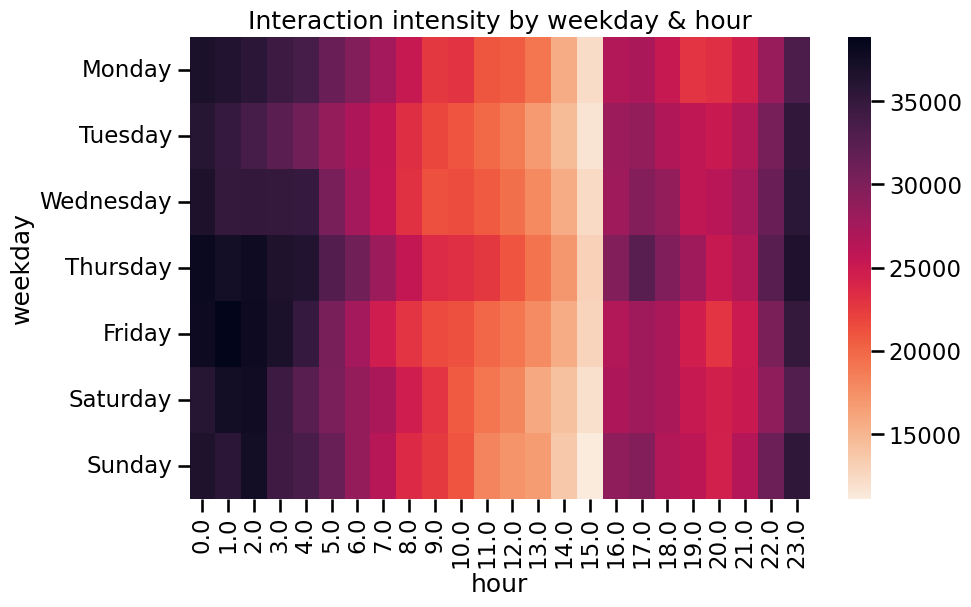

In [15]:
interactions["hour"] = interactions["timestamp"].dt.hour
interactions["weekday"] = interactions["timestamp"].dt.day_name()

pivot = (interactions
         .groupby(["weekday", "hour"], observed=True)
         .size()
         .unstack(fill_value=0)
         .reindex(index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]))

sns.heatmap(pivot, cmap="rocket_r")
plt.title("Interaction intensity by weekday & hour")
plt.show()

#### 🔄 Recency feature – days since last watch for each user


In [16]:
interactions["prev_ts"] = interactions.groupby("user_id")["timestamp"].shift()
interactions["days_since_prev"] = (
    (interactions["timestamp"] - interactions["prev_ts"]).dt.total_seconds() / 86400
)

# Fill NA (first action) with a high value
interactions["days_since_prev"].fillna(interactions["days_since_prev"].max() + 1, inplace=True)


/tmp/ipykernel_188216/420894655.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  interactions["days_since_prev"].fillna(interactions["days_since_prev"].max() + 1, inplace=True)


#### 🗺️ Sparcity of user-item matrix for `small_matrix.csv`


Sparsity matrix size 1411×3327 — densité=0.996202 → sparsité=0.3798%


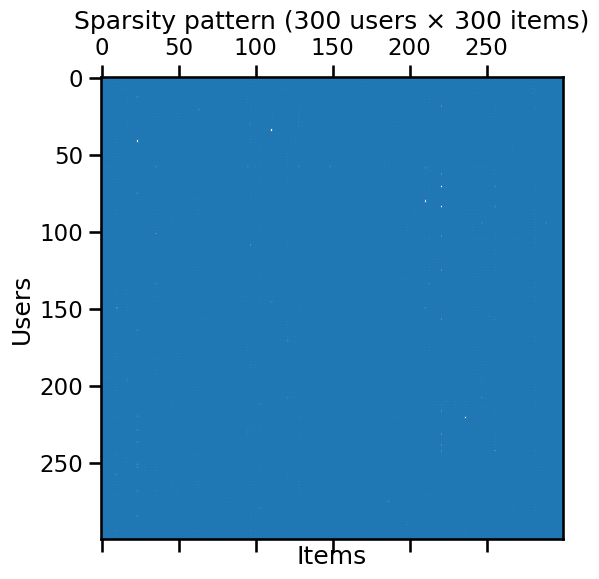

In [17]:

from scipy.sparse import coo_matrix

# 1. Encodage compact des IDs → index 0…n-1
u_codes = interactions["user_id"].astype("category").cat.codes.values
i_codes = interactions["video_id"].astype("category").cat.codes.values

n_users = interactions["user_id"].nunique()
n_items = interactions["video_id"].nunique()

# 2. Construire matrice creuse (1 = au moins une interaction)
M = coo_matrix((np.ones_like(u_codes, dtype=np.int8),
                (u_codes, i_codes)),
               shape=(n_users, n_items))

density  = M.nnz / (n_users * n_items)
sparsity = 1 - density
print(f"Sparsity matrix size {n_users}×{n_items} — densité={density:.6f} → sparsité={sparsity:.4%}")

# 3. Visualisation – échantillon 300×300 pour lisibilité
sample_u = min(300, n_users)
sample_i = min(300, n_items)

mask = (u_codes < sample_u) & (i_codes < sample_i)
M_small = coo_matrix((np.ones_like(u_codes[mask]),
                      (u_codes[mask], i_codes[mask])),
                     shape=(sample_u, sample_i))

plt.figure(figsize=(6, 6))
plt.spy(M_small, markersize=1)
plt.title(f"Sparsity pattern ({sample_u} users × {sample_i} items)")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()


#### Sparcity of user-item matrix for `big_matrix.csv`

Sparsity matrix size 7176×10728 — densité=0.162771 → sparsité=83.7229%


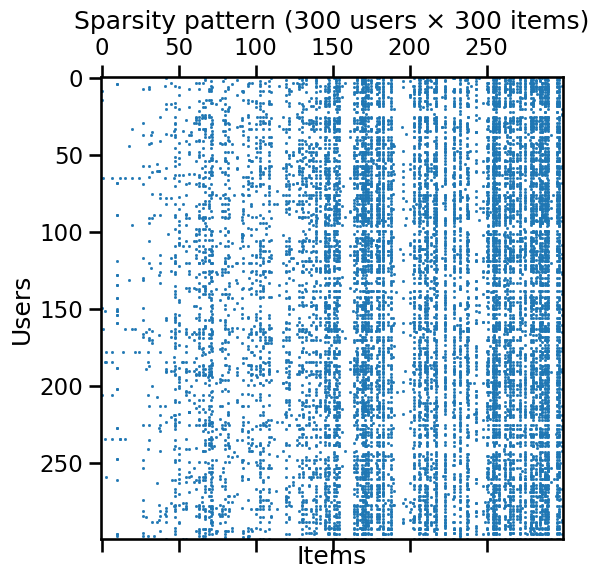

In [18]:

from scipy.sparse import coo_matrix
interactions = pd.read_csv(DATA_DIR / "big_matrix.csv")
# 1. Encodage compact des IDs → index 0…n-1
u_codes = interactions["user_id"].astype("category").cat.codes.values
i_codes = interactions["video_id"].astype("category").cat.codes.values

n_users = interactions["user_id"].nunique()
n_items = interactions["video_id"].nunique()

# 2. Construire matrice creuse (1 = au moins une interaction)
M = coo_matrix((np.ones_like(u_codes, dtype=np.int8),
                (u_codes, i_codes)),
               shape=(n_users, n_items))

density  = M.nnz / (n_users * n_items)
sparsity = 1 - density
print(f"Sparsity matrix size {n_users}×{n_items} — densité={density:.6f} → sparsité={sparsity:.4%}")

# 3. Visualisation – échantillon 300×300 pour lisibilité
sample_u = min(300, n_users)
sample_i = min(300, n_items)

mask = (u_codes < sample_u) & (i_codes < sample_i)
M_small = coo_matrix((np.ones_like(u_codes[mask]),
                      (u_codes[mask], i_codes[mask])),
                     shape=(sample_u, sample_i))

plt.figure(figsize=(6, 6))
plt.spy(M_small, markersize=1)
plt.title(f"Sparsity pattern ({sample_u} users × {sample_i} items)")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()


#### More complete data visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from scipy.stats import norm

myfont = FontProperties(fname="./SimHei.ttf")

def visual_continue(series, func=None):
    """
    Plot a histogram with KDE and normal fit for a continuous variable.
    """
    name = getattr(series, "name", "variable")
    ax = sns.histplot(series, color='darkcyan', kde=True, stat="density", linewidth=0)
    # Fit and plot normal distribution
    mu, std = norm.fit(series.dropna())
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label="Normal fit")
    if func:
        func(ax)
    ax.set_title(f"Statistics of {name}", fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    ax.set_xlabel(name, fontsize=14)
    ax.legend()
    plt.show()

def visual_statistics_discrete(series, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    """
    Plot a countplot for a discrete variable, optionally showing ratio annotations.
    """
    ncount = len(series)
    fig, ax1 = plt.subplots(figsize=size)
    sns.countplot(x=series, color="#e89f9f", linewidth=.8, edgecolor='darkcyan', ax=ax1, order=order)
    plt.grid(axis='y', linestyle='-.')
    ax1.set_title(f"Statistics of {var}", fontsize=14)
    ax1.set_ylabel("Count", fontsize=14)
    ax1.set_xlabel(var, fontsize=14)
    if func:
        func(ax1)
    if display_ratio:
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)
        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)
        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)
    plt.show()

count    472.000000
mean       1.419492
std        0.853295
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: friend_list, dtype: float64


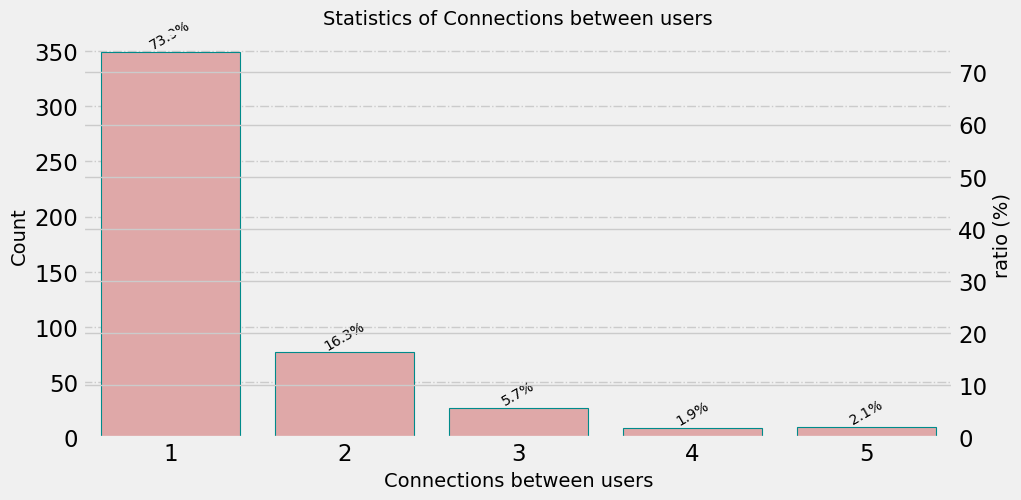

In [ ]:
user_friend_connections = pd.read_csv(DATA_DIR / "social_network.csv")
user_friend_connections["friend_list"] = user_friend_connections["friend_list"].map(eval)

print(user_friend_connections.friend_list.map(len).describe())
visual_statistics_discrete(user_friend_connections.friend_list.map(len), "Connections between users", size=(10, 5))

## Connection between users

First, we analyzed the social network data by looking at each user’s friend count. The results show that most users have just one friend. With an average of about 1.41 friends and a maximum of 5, it’s clear that users generally keep their networks small. This pattern implies that people tend to connect primarily with close friends or family members, reflecting shared interests or preferences.

#### Social‐based Recommendations Will Be Limited

With 73% of users having exactly one friend and 89% having two or fewer, you simply don’t have enough social links to drive a pure “friend-of-friend” or network‐propagation recommender for the vast majority of your audience.


#### Cold-Start & Sparsity Concerns

Users with only a single connection are effectively “isolated” in a social graph sense, so collaborative‐filtering approaches that rely on overlapping neighborhoods will struggle.

### Tag Distribution
Let’s examine how video tags (categories) are spread across the dataset.


count    10728.000000
mean         1.183166
std          0.436205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: feat, dtype: float64


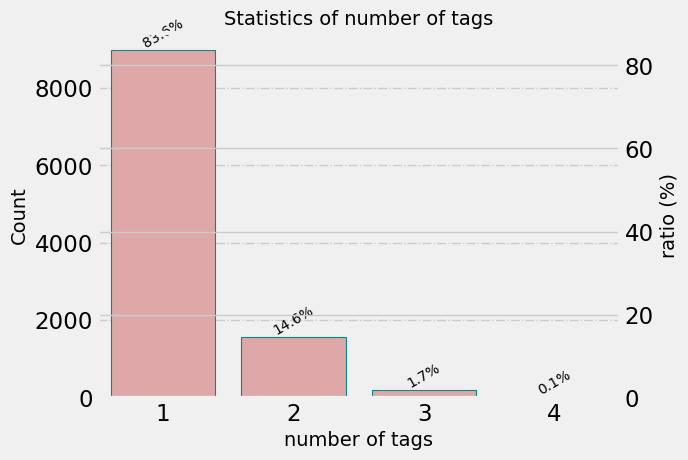

In [35]:
item_categories = pd.read_csv(DATA_DIR / "item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

num_feat = item_categories.feat.map(len)
print(num_feat.describe())
visual_statistics_discrete(num_feat, "number of tags")

Now we analyze how item categories (tags) are assigned to videos. The distribution is sparse: most videos have just one tag, with a maximum of four and an average of about 1.18 tags per video. Importantly, every video has at least one tag.

This focused tagging indicates that videos are generally linked to specific topics rather than broad categories. From a modeling standpoint, this has several benefits:

- Content-based models can create more precise item profiles, minimizing noise.
- Embedding methods may be more effective due to fewer, clearer category associations.
- The limited tag overlap can enhance category-aware recommendation approaches by preserving strong tag-specific relevance.

### Let’s examine how video tags (categories) are distributed.

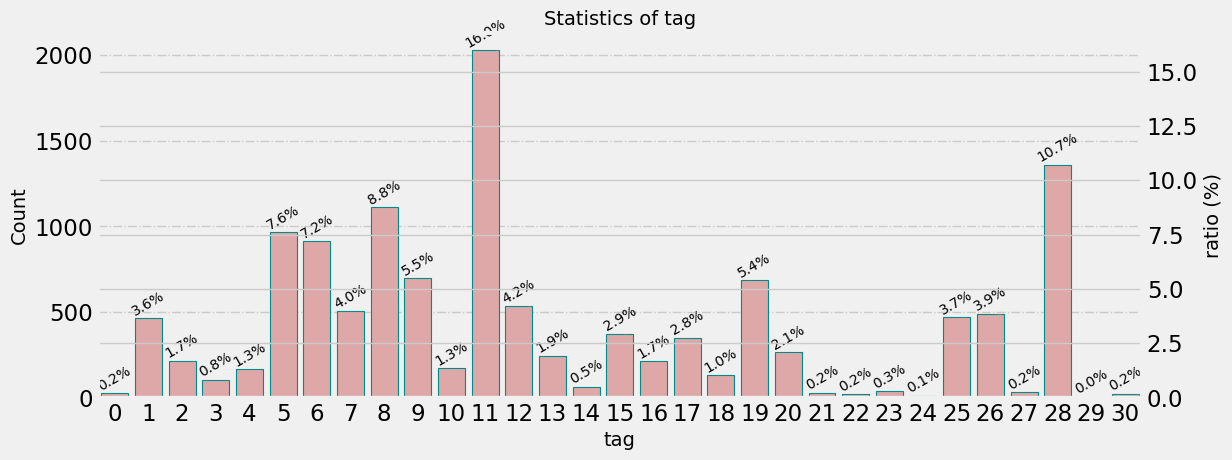

In [36]:
import collections
import itertools

cnt = item_categories.feat.map(collections.Counter)
cnt_all = collections.Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

The chart highlights a significant imbalance: tags such as 11 and 28 are the most frequent, each accounting for over 10% of all entries, while many other tags are much less common.

This pattern reflects a long-tail distribution, where a small number of tags are highly prevalent and most tags are rarely assigned—a trend often seen in user-generated content.

**Implications for Recommendation Models:**

- Highly popular tags can introduce bias, making recommendations less diverse.
- Rare tags may cause cold-start problems for collaborative filtering approaches.

**Potential Solutions:**

- Reweight tags to reduce the influence of dominant categories.
- Oversample items with rare tags to improve their representation.
- Use embedding-based methods to better capture relationships among tags and support generalization to less common categories.

### Distribution of watch ratio

In [ ]:
watch_ratio = interactions.watch_ratio[interactions.watch_ratio <= 5]

visual_continue(watch_ratio)

# Conclusion

Our exploratory analysis of the Kuairec dataset has revealed several consistent patterns and actionable insights:

### Sparse Social Connectivity

The vast majority of users maintain just one social connection, indicating that social signals alone will be weak for broad coverage in recommendation.

### Highly Focused Viewing Behavior

Most users concentrate their attention on only a few videos, often watching them intensively. 

### Duration-Engagement Trade-off

Shorter videos achieve notably higher rewatch rates (watch_ratio ≥ 2), highlighting the value of bite-sized content for driving repeat consumption.

### Long-Tail Tag Distribution with Engagement Hotspots

Video tags follow a classic long-tail: a few tags (e.g. tag 28) dominate and also correlate with higher engagement, while the majority of tags are sparsely represented.

## **Implications for Our Recommender System**

### Hybrid Recommendation Strategy:
Combine content-based signals (video metadata, duration) and popularity/popular-tag signals for low-connectivity users, while leveraging the limited social graph for the small subset of more connected users.

### Personalization for Core Interests:
Prioritize tailoring recommendations to a user’s most watched and rewatched videos, rather than broad browsing suggestions, to maximize satisfaction.

### Short-Form Content Emphasis:
Elevate shorter videos in ranking and explore formats that encourage rapid, repeat viewership to capitalize on the duration-engagement relationship.

### Tag-Aware Balancing:
Mitigate popularity bias by reweighting or oversampling underrepresented tags, and use embedding-based methods to infer relationships between rare and common categories—ensuring diversity without sacrificing relevance.